In [28]:

import types
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_615887cdf63b4d15b786ad57f6e840c4 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='CmnyNTkkpkHcFgY-ulSHs668HeXFbRKD4Y6t-pewTL1D',
    ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_615887cdf63b4d15b786ad57f6e840c4.get_object(Bucket='projectckd-donotdelete-pr-hhtv0x7kcgph0l',Key='ckd.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body)
data.head()
print (data)


      id   age     bp     sg   al   su       rbc        pc         pcc  \
0      0  48.0   80.0  1.020  1.0  0.0       NaN    normal  notpresent   
1      1   7.0   50.0  1.020  4.0  0.0       NaN    normal  notpresent   
2      2  62.0   80.0  1.010  2.0  3.0    normal    normal  notpresent   
3      3  48.0   70.0  1.005  4.0  0.0    normal  abnormal     present   
4      4  51.0   80.0  1.010  2.0  0.0    normal    normal  notpresent   
5      5  60.0   90.0  1.015  3.0  0.0       NaN       NaN  notpresent   
6      6  68.0   70.0  1.010  0.0  0.0       NaN    normal  notpresent   
7      7  24.0    NaN  1.015  2.0  4.0    normal  abnormal  notpresent   
8      8  52.0  100.0  1.015  3.0  0.0    normal  abnormal     present   
9      9  53.0   90.0  1.020  2.0  0.0  abnormal  abnormal     present   
10    10  50.0   60.0  1.010  2.0  4.0       NaN  abnormal     present   
11    11  63.0   70.0  1.010  3.0  0.0  abnormal  abnormal     present   
12    12  68.0   70.0  1.015  3.0  1.0

In [22]:
print("Size of data is:",data.shape)
data.columns

Size of data is: (400, 26)


Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [23]:
data.head()


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [24]:
data.describe(include=['object'])


,rbc,pc,pcc,ba,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
count,248,335,396,396,330,295,270,398,398,398,399,399,399,400
unique,2,2,2,2,44,92,49,2,5,3,2,2,2,3
top,normal,normal,notpresent,notpresent,41,9800,5.2,no,no,no,good,no,no,ckd
freq,201,259,354,374,21,11,18,251,258,362,317,323,339,248


In [25]:
print("pcv value counts:\n",data['pcv'].value_counts())
print("rc value counts:\n",data['rc'].value_counts())
print("wc value counts:\n",data['wc'].value_counts())

pcv value counts:
 41      21
52      21
44      19
48      19
40      16
43      14
42      13
45      13
36      12
33      12
50      12
32      12
28      12
34      11
37      11
35       9
46       9
29       9
30       9
31       8
24       7
39       7
26       6
38       5
51       4
47       4
53       4
54       4
49       4
27       3
25       3
22       3
19       2
23       2
17       1
\t43     1
\t?      1
20       1
21       1
18       1
15       1
16       1
14       1
9        1
Name: pcv, dtype: int64
rc value counts:
 5.2    18
4.5    16
4.9    14
4.7    11
3.9    10
4.8    10
4.6     9
3.4     9
5.0     8
5.5     8
6.1     8
5.9     8
3.7     8
5.3     7
5.4     7
5.8     7
3.8     7
5.6     6
4.3     6
4.2     6
3.2     5
6.5     5
6.2     5
5.1     5
4.4     5
5.7     5
6.4     5
4.1     5
3.6     4
6.3     4
6.0     4
4.0     3
3.5     3
3.3     3
4       3
2.9     2
2.6     2
3.1     2
2.5     2
5       2
2.7     2
3.0     2
2.8     2
2.1     2
2.3     1
8.0  

In [29]:
data['pcv']=data['pcv'].replace('\t?',np.nan)
data['pcv']=data['pcv'].replace('\t43',43)
data['wc']=data['wc'].replace('\t8400',8400)
data['wc']=data['wc'].replace('\t6200',6200)
data['wc']=data['wc'].replace('\t?',np.nan)
data['rc']=data['rc'].replace('\t?',np.nan)

In [30]:
print(data['pcv'].dtype)
print(data['wc'].dtype)
print(data['rc'].dtype)

object
object
object


In [31]:
for x in data['pcv']:
    if type(x)!=float:
        data['pcv']=data['pcv'].replace(x,int(x))
for x in data['wc']:
    if type(x)!=float:
        data['wc']=data['wc'].replace(x,int(x))
for x in data['rc']:
    if type(x)!=float:
        data['rc']=data['rc'].replace(x,float(x))

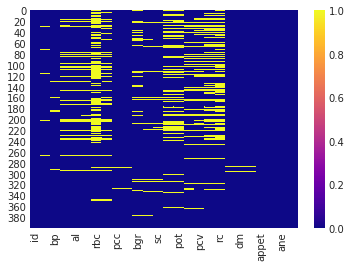

In [33]:
sns.heatmap(data.isnull(),cmap='plasma')


In [34]:
data.isnull().sum()


id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                71
wc                106
rc                131
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [35]:
print("rbc:\n",data['rbc'].value_counts())
print('pc:\n',data['pc'].value_counts())
print('pcc:\n',data['pcc'].value_counts())
print('ba:\n',data['ba'].value_counts())
print('htn:\n',data['htn'].value_counts())
print('dm:\n',data['dm'].value_counts())
print('cad:\n',data['cad'].value_counts())
print('appet:\n',data['appet'].value_counts())
print('pe:\n',data['pe'].value_counts())
print('ane:\n',data['ane'].value_counts())

rbc:
 normal      201
abnormal     47
Name: rbc, dtype: int64
pc:
 normal      259
abnormal     76
Name: pc, dtype: int64
pcc:
 notpresent    354
present        42
Name: pcc, dtype: int64
ba:
 notpresent    374
present        22
Name: ba, dtype: int64
htn:
 no     251
yes    147
Name: htn, dtype: int64
dm:
 no       258
yes      134
\tno       3
\tyes      2
 yes       1
Name: dm, dtype: int64
cad:
 no      362
yes      34
\tno      2
Name: cad, dtype: int64
appet:
 good    317
poor     82
Name: appet, dtype: int64
pe:
 no     323
yes     76
Name: pe, dtype: int64
ane:
 no     339
yes     60
Name: ane, dtype: int64


In [36]:
data['rbc'].fillna('normal',inplace=True)
data['pc'].fillna('normal',inplace=True)
data['pcc'].fillna('notpresent',inplace=True)
data['ba'].fillna('notpresent',inplace=True)
data['htn'].fillna('no',inplace=True)
data['dm'].fillna('no',inplace=True)
data['cad'].fillna('no',inplace=True)
data['appet'].fillna('good',inplace=True)
data['pe'].fillna('no',inplace=True)
data['ane'].fillna('no',inplace=True)

In [37]:
data.fillna(data.mean(),inplace=True)
data.isnull().sum()


id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

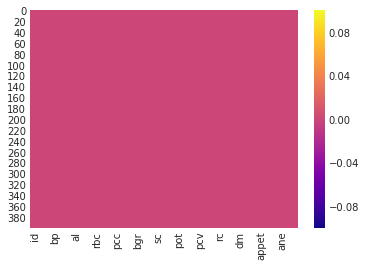

In [38]:
sns.heatmap(data.isnull(),cmap='plasma')


In [44]:
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,...,44.0,7800.0,5.200000,1,1,0,1,0,0,1
1,1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,...,38.0,6000.0,4.707435,0,0,0,1,0,0,1
2,2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,...,31.0,7500.0,4.707435,0,1,0,0,0,1,1
3,3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,...,32.0,6700.0,3.900000,1,0,0,0,1,1,1
4,4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,...,35.0,7300.0,4.600000,0,0,0,1,0,0,1


/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


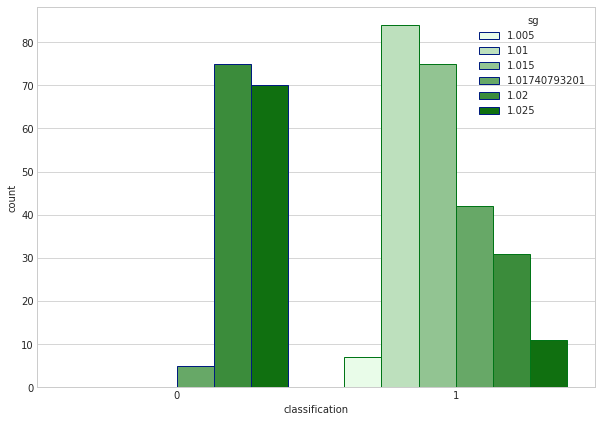

In [46]:
sns.set_style('whitegrid')
plt.subplots(figsize=(10,7))
sns.countplot(x='classification',hue='sg',data=data,color='green',edgecolor=sns.color_palette("dark", 3))

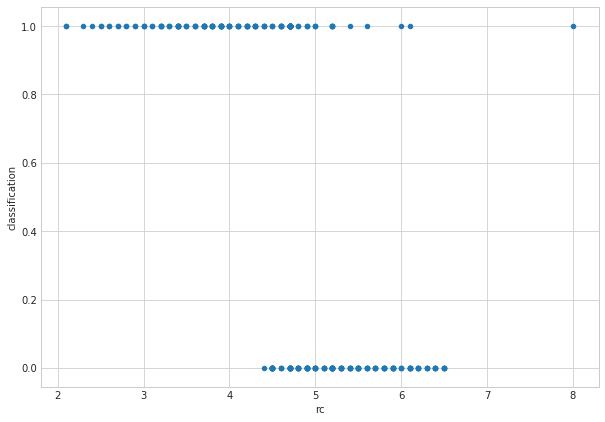

In [47]:
data.plot(kind='scatter',x='rc',y='classification',figsize=(10,7))


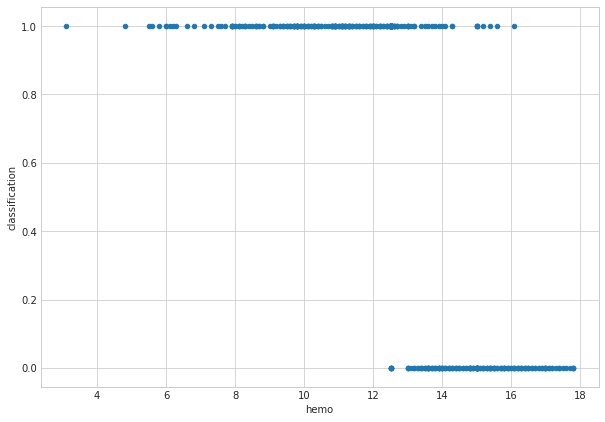

In [48]:
data.plot(kind='scatter',x='hemo',y='classification',figsize=(10,7))


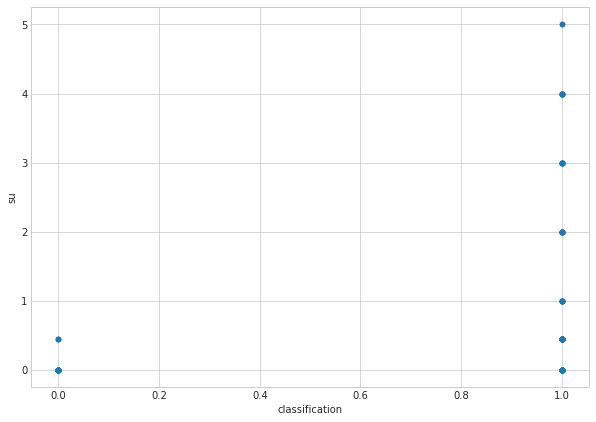

In [49]:
data.plot(kind='scatter',x='classification',y='su',figsize=(10,7))


In [50]:
data.corr()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
id,1.000000,-0.184043,-0.243732,0.613623,-0.520040,-0.271330,0.231457,0.335825,-0.264142,-0.115955,...,0.581242,-0.174804,0.515032,-0.520089,-0.475106,-0.205575,0.374394,-0.308120,-0.273096,-0.838528
age,-0.184043,1.000000,0.148004,-0.180570,0.114764,0.207857,-0.011783,-0.101951,0.159074,0.043573,...,-0.211805,0.100061,-0.201051,0.393440,0.363475,0.232951,-0.157741,0.094434,0.050567,0.225405
bp,-0.243732,0.148004,1.000000,-0.182463,0.146593,0.200784,-0.151369,-0.156856,0.059560,0.112173,...,-0.292714,0.026067,-0.220822,0.270447,0.228250,0.086618,-0.177601,0.054083,0.194962,0.290600
sg,0.613623,-0.180570,-0.182463,1.000000,-0.466698,-0.287993,0.236228,0.345325,-0.290663,-0.220792,...,0.528437,-0.201311,0.466976,-0.366959,-0.393190,-0.154803,0.246822,-0.272476,-0.213276,-0.698957
al,-0.520040,0.114764,0.146593,-0.466698,1.000000,0.268070,-0.373927,-0.535157,0.399749,0.367855,...,-0.527242,0.200443,-0.454886,0.481724,0.378042,0.236745,-0.330562,0.440893,0.282305,0.599238
su,-0.271330,0.207857,0.200784,-0.287993,0.268070,1.000000,-0.074324,-0.168826,0.151445,0.107684,...,-0.202573,0.153274,-0.182278,0.293179,0.472330,0.246702,-0.080648,0.130721,0.066348,0.327812
rbc,0.231457,-0.011783,-0.151369,0.236228,-0.373927,-0.074324,1.000000,0.377394,-0.102948,-0.184402,...,0.280958,-0.002207,0.202455,-0.140538,-0.145646,-0.111493,0.160868,-0.199285,-0.107625,-0.282642
pc,0.335825,-0.101951,-0.156856,0.345325,-0.535157,-0.168826,0.377394,1.000000,-0.520118,-0.330401,...,0.418580,-0.107886,0.383240,-0.291719,-0.201032,-0.172295,0.274985,-0.350227,-0.260566,-0.375154
pcc,-0.264142,0.159074,0.059560,-0.290663,0.399749,0.151445,-0.102948,-0.520118,1.000000,0.275082,...,-0.294242,0.163456,-0.267982,0.195623,0.165236,0.188029,-0.189688,0.104356,0.175861,0.265313
ba,-0.115955,0.043573,0.112173,-0.220792,0.367855,0.107684,-0.184402,-0.330401,0.275082,1.000000,...,-0.189822,0.103546,-0.192222,0.089046,0.080070,0.162395,-0.149126,0.134732,0.052208,0.186871


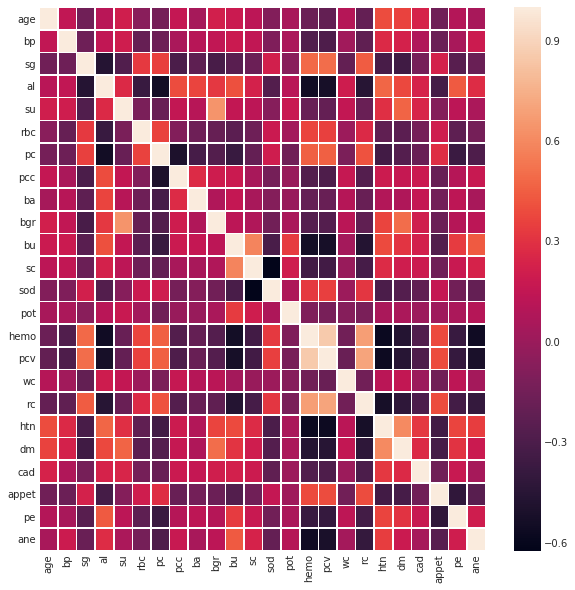

In [82]:
plt.subplots(figsize=(10,10))
sns.heatmap(data.corr(),linewidths=0.6)

In [52]:
datan=data.drop(columns=['age'])
datan.head()

,id,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,80.0,1.020,1.0,0.0,1,1,0,0,121.000000,...,44.0,7800.0,5.200000,1,1,0,1,0,0,1
1,1,50.0,1.020,4.0,0.0,1,1,0,0,148.036517,...,38.0,6000.0,4.707435,0,0,0,1,0,0,1
2,2,80.0,1.010,2.0,3.0,1,1,0,0,423.000000,...,31.0,7500.0,4.707435,0,1,0,0,0,1,1
3,3,70.0,1.005,4.0,0.0,1,0,1,0,117.000000,...,32.0,6700.0,3.900000,1,0,0,0,1,1,1
4,4,80.0,1.010,2.0,0.0,1,1,0,0,106.000000,...,35.0,7300.0,4.600000,0,0,0,1,0,0,1


In [53]:
ar=datan.values
x=ar[:,0:23]
y=ar[:,23]

In [60]:
#Logistic Regression
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [61]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,Y_train)
prediction=lr.predict(X_test)
from sklearn.metrics import accuracy_score
np.set_printoptions(precision=3)
accuracy_score(Y_test,prediction)

0.875

In [62]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,prediction)

array([[99,  6],
       [ 9,  6]])

In [63]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 
gnb.fit(X_train, Y_train) 
NY_predict=gnb.predict(X_test)
accuracy_score(Y_test,NY_predict)

0.84999999999999998

In [75]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
seed = 7
kfold = model_selection.KFold(n_splits=101, random_state=seed)
model = KNeighborsClassifier()
results = model_selection.cross_val_score(model,x,y, cv=kfold)
print(results.mean())

0.739273927393
